<a href="https://colab.research.google.com/github/wenyaoc/VIP/blob/dpkt/Basics_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [ ]:
import pandas as pd
import seaborn as sns

# Load data

In [ ]:
iris = sns.load_dataset("iris")         # pd.read_csv('data.csv')  
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data visualisation

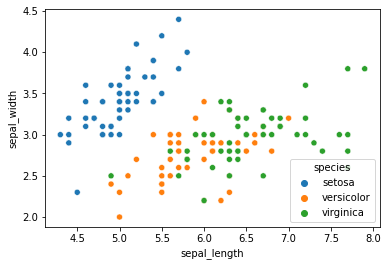

In [ ]:
ax = sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")

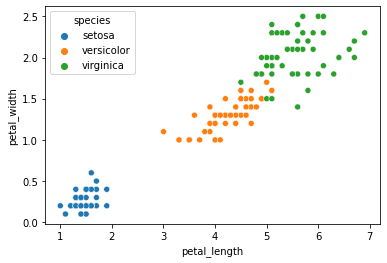

In [ ]:
ax = sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species")

# Split data into attribues (X) and class (Y)

In [ ]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:,-1]

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# $k$-Nearest Neighbour ($k$-NN): a distance-based classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, Y)
predictions = knn_model.predict([[4.8, 3.1, 1, 0.1]])
print(predictions)

['setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Split data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3)

knn_model.fit(train_X, train_Y)
predictions = knn_model.predict(test_X)
print(predictions)

['setosa' 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'setosa']


# Compute performance measures for classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(test_Y, predictions))
print(confusion_matrix(test_Y, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        16
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]


# Clustering with $k$-Means

In [ ]:
from sklearn.cluster import KMeans

k_means_model = KMeans(n_clusters=3)
k_means_model.fit(X)

KMeans(n_clusters=3)

In [ ]:
k_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
k_means_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualising $k$-Means output

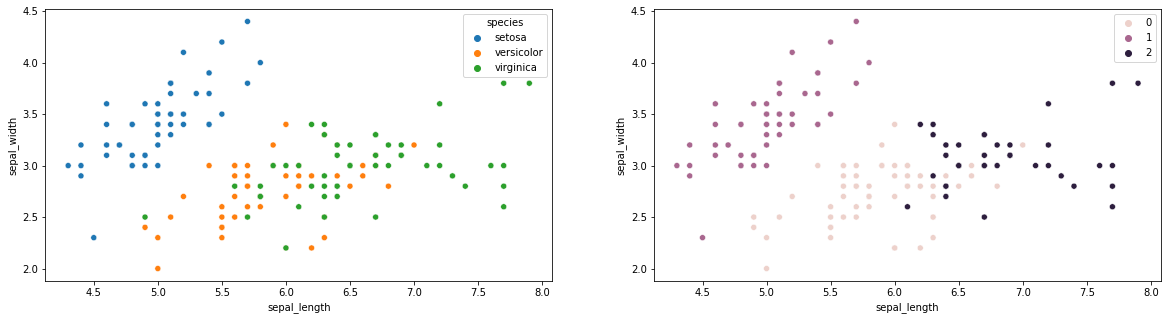

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
ax = sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", ax=ax1)
ax= sns.scatterplot(data=X, x="sepal_length", y="sepal_width", hue=k_means_model.labels_, ax=ax2)

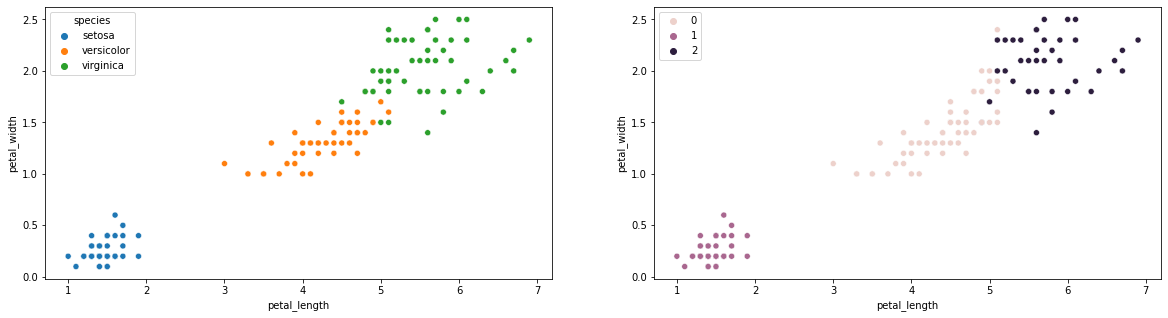

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", ax=ax1)
sns.scatterplot(data=X, x="petal_length", y="petal_width", hue=k_means_model.labels_, ax=ax2)

# Random Forest: a more powerful classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(train_X, train_Y)
predictions = RF_model.predict(test_X)
print(classification_report(test_Y, predictions))
print(confusion_matrix(test_Y, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.84      1.00      0.91        16
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[14  0  0]
 [ 0 16  0]
 [ 0  3 12]]


# Time series clustering

## Installing tslean

In [ ]:
!python -m pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.1 MB/s 


# Loading the library

# Loading data

In [ ]:
from tslearn.datasets import UCR_UEA_datasets

X_train, Y_train, X_test, Y_test = UCR_UEA_datasets().load_dataset("GunPoint")
print(X_train.shape)
print(Y_train.shape)

(50, 150, 1)
(50,)


# Plotting a time series

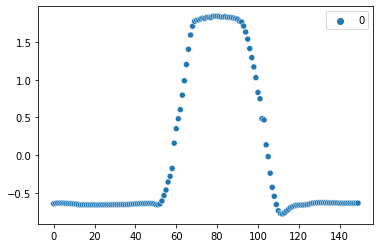

In [ ]:
ax = sns.scatterplot(data=X_train[0])

In [ ]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

knn_ts_model = KNeighborsTimeSeriesClassifier(metric='dtw', n_neighbors=1)
knn_ts_model.fit(X_train, Y_train)
predictions = knn_ts_model.predict(X_test)
print(predictions)

[1 2 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 1 1 2 2 1 2 2 2 1 1 1
 1 1 2 1 2 1 1 2 1 2 2 2 2 2 2 1 2 1 1 2 2 1 1 1 2 1 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 2 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 2 2
 2 1 2 1 1 2 1 1 2 1 2 2 2 1 2 1 1 2 2 2 2 1 1 1 2 1 2 1 2 2 1 1 2 2 2 1 1
 2 1]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           1       0.93      0.88      0.91        76
           2       0.88      0.93      0.91        74

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

[[67  9]
 [ 5 69]]


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
km.fit(X_train)

TimeSeriesKMeans(metric='dtw', n_clusters=2)